In [1]:
#CTa-HW09-Surf's Up
#Part 03 - Climate Analysis

In [2]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime
import matplotlib.ticker as mticker
import seaborn as sns

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func, text
from sqlalchemy import Column, Integer, String, Float, Date, DateTime

In [17]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()
Base.metadata.create_all(conn)

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Assign the measurement to a variable called `measurement`
measurement = Base.classes.measurement

In [9]:
# Assign the station to a variable called `station`
station = Base.classes.station

In [10]:
# Create a session
session = Session(engine)

In [11]:
# Check SQL Lite to see if there is data in the tables for measurement
session.query(measurement.station).group_by(measurement.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [12]:
# Check SQL Lite to see if there is data in the tables for station
session.query(station.name).group_by(station.name).all()

[('HONOLULU OBSERVATORY 702.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('MANOA LYON ARBO 785.2, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('WAIKIKI 717.2, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US')]

In [18]:
# Precipitation Analysis
# Last 12 months of precipitation data
pa_results = pd.read_sql("SELECT date, prcp FROM measurement WHERE date between '2016-08-23' AND '2017-08-23';", conn)
pa_results['date'] = pd.to_datetime(pa_results['date'])
pa_results['month'] = pa_results['date'].dt.month
pa_results = pa_results.groupby(["month"]).sum()
pa_results

,prcp
month,
1,11.95
2,39.06
3,29.62
4,54.91
5,25.27
6,20.52
7,23.72
8,25.99
9,49.40


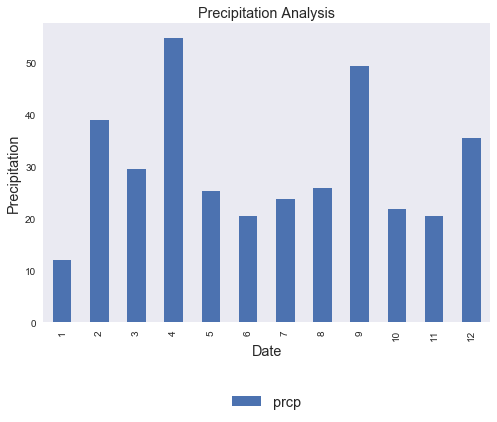

In [20]:
# Create bar chart for precipitation analysis
pa_results.plot.bar()
plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2, fontsize="large")
plt.xlabel('Date', fontsize="large")
plt.ylabel('Precipitation', fontsize="large")
#set_major_formatter(dates.DateFormatter('%m.%Y'))
print("")
plt.title('Precipitation Analysis', fontsize="large")
plt.grid()
#plt.savefig("PrecipitationAnalysis.png")
plt.show()

In [31]:
# Station Analysis
# Last 12 months of tobs data
sa_results = pd.read_sql("SELECT date, station, tobs FROM measurement WHERE date between '2016-08-23' AND '2017-08-23';", conn)
sa_results['date'] = pd.to_datetime(sa_results['date'])
#sa_results['month'] = sa_results['date'].dt.month
sa_results = sa_results.groupby(["station"]).sum()


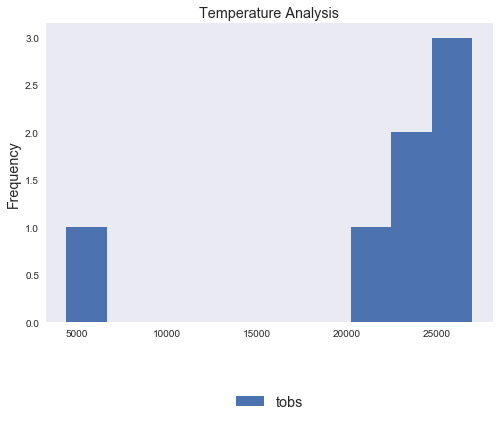

In [29]:
# Create a histogram chart for temperature analysis
sa_results.plot.hist()
plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2, fontsize="large")
plt.xlabel('', fontsize="large")
plt.ylabel('Frequency', fontsize="large")
print("")
plt.title('Temperature Analysis', fontsize="large")
plt.grid()
plt.show()

In [ ]:
# Temparature Analysis
ta_results = pd.read_sql("SELECT date, station, tobs FROM measurement WHERE date between '2016-08-23' AND '2017-08-23';", conn)
ta_results['date'] = pd.to_datetime(ta_results['date'])
#sa_results['month'] = sa_results['date'].dt.month
ta_results = ta_results.groupby(["station"]).sum()
ta_results

In [ ]:
# Create a histogram chart for temperature analysis
ta_results.plot.bar()
plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2, fontsize="large")
plt.xlabel('', fontsize="large")
plt.ylabel('Temperature (F)', fontsize="large")
print("")
plt.title('Temperature Analysis', fontsize="large")
plt.grid()
plt.show()

In [38]:
# Function to return avg temp for data range

def calc_temps(startDate, endDate):
   avgtobs = session.query(func.avg(measurement.tobs)).filter(and_(measurement.date >= startDate, measurement.date <= endDate))
   meanTemp = avgtobs[0][0]
   mintobs = session.query(func.min(measurement.tobs)).filter(and_(measurement.date >= startDate, measurement.date <= endDate))
   minTemp = mintobs[0][0]
   maxtobs = session.query(func.max(measurement.tobs)).filter(and_(measurement.date >= startDate, measurement.date <= endDate))
   maxTemp = maxtobs[0][0]
   return(meanTemp, minTemp, maxTemp)

In [ ]:
# Create a histogram chart for temperature analysis
ta_results.plot.bar()
plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2, fontsize="large")
plt.xlabel('', fontsize="large")
plt.ylabel('Temperature (F)', fontsize="large")
print("")
plt.title('Temperature Analysis', fontsize="large")
plt.grid()
plt.show()